# Рубежный контроль №2

## Назаров М.М. ИУ5-63Б

## Вариант №15

**Задание:** Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д

**Методы для ИУ5-63Б.** Метод №1: "Дерево решений". Метод №2: "Случайный лес".

**Набор данных:** [U.S. Education Datasets: Unification Project](https://www.kaggle.com/noriuk/us-education-datasets-unification-project)

## Импорт библиотек

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Загрузка и первичная обработка набора данных

In [108]:
# загрузка набора данных
data=pd.read_csv('states_all_extended.csv', sep=",")
# размер набора данных
data.shape

(1715, 266)

In [109]:
# первые 5 строк набора данных
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
parts = np.split(data, [13], axis=1)
data = parts[0]

In [111]:
# список колонок с типами данных
data.dtypes

PRIMARY_KEY                     object
STATE                           object
YEAR                            object
ENROLL                          object
TOTAL_REVENUE                   object
FEDERAL_REVENUE                 object
STATE_REVENUE                   object
LOCAL_REVENUE                   object
TOTAL_EXPENDITURE               object
INSTRUCTION_EXPENDITURE         object
SUPPORT_SERVICES_EXPENDITURE    object
OTHER_EXPENDITURE               object
CAPITAL_OUTLAY_EXPENDITURE      object
dtype: object

In [112]:
data.drop(['ENROLL','PRIMARY_KEY'], axis = 1, inplace = True)

## Обработка пропусков данных

In [113]:
le = LabelEncoder()
le.fit(data.STATE.drop_duplicates()) 
data.STATE = le.transform(data.STATE)

In [114]:
# Удаление строк, содержащих пустые значения
data_new = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((1715, 11), (1224, 11))

In [115]:
data=data_new

In [116]:
data.isnull().sum()

STATE                           0
YEAR                            0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
dtype: int64

In [117]:
data.head()

,STATE,YEAR,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
51,0,1993,2.82739e+06,331409,1.7293e+06,766687,2.83343e+06,1.56456e+06,794146,237222,204207
52,1,1993,1.1914e+06,176150,775829,239419,1.1264e+06,494917,433788,36291,135791
53,2,1993,3.42798e+06,318465,1.41541e+06,1.6941e+06,3.62395e+06,1.57889e+06,1.00091e+06,164083,680139
54,3,1993,1.34691e+06,128196,771079,447634,1.37607e+06,782791,386526,68617,97824
55,4,1993,2.80433e+07,2.15116e+06,1.70641e+07,8.82804e+06,2.8111e+07,1.52811e+07,8.91456e+06,1.60851e+06,1.94476e+06


## Масштабирование данных:
### MinMax масштабирование

In [118]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [119]:
# Числовые колонки для масштабирования
scale_cols = num_cols

In [120]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[scale_cols])

In [121]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc1_data[:,i]

<ipython-input-121-29357899d09f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[new_col_name] = sc1_data[:,i]


In [122]:
data.head()

,STATE,YEAR,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,TOTAL_REVENUE_scaled,FEDERAL_REVENUE_scaled,STATE_REVENUE_scaled,LOCAL_REVENUE_scaled,TOTAL_EXPENDITURE_scaled,INSTRUCTION_EXPENDITURE_scaled,SUPPORT_SERVICES_EXPENDITURE_scaled,OTHER_EXPENDITURE_scaled,CAPITAL_OUTLAY_EXPENDITURE_scaled
51,0,1993,2.82739e+06,331409,1.7293e+06,766687,2.83343e+06,1.56456e+06,794146,237222,204207,0.026611,0.029904,0.033971,0.020586,0.027721,0.029726,0.025240,0.056641,0.018754
52,1,1993,1.1914e+06,176150,775829,239419,1.1264e+06,494917,433788,36291,135791,0.008177,0.014310,0.015241,0.005973,0.007600,0.005249,0.011337,0.006212,0.012054
53,2,1993,3.42798e+06,318465,1.41541e+06,1.6941e+06,3.62395e+06,1.57889e+06,1.00091e+06,164083,680139,0.033378,0.028604,0.027805,0.046289,0.037038,0.030054,0.033218,0.038285,0.065364
54,3,1993,1.34691e+06,128196,771079,447634,1.37607e+06,782791,386526,68617,97824,0.009929,0.009494,0.015148,0.011743,0.010542,0.011836,0.009513,0.014325,0.008336
55,4,1993,2.80433e+07,2.15116e+06,1.70641e+07,8.82804e+06,2.8111e+07,1.52811e+07,8.91456e+06,1.60851e+06,1.94476e+06,0.310729,0.212673,0.335218,0.244007,0.325670,0.343614,0.338551,0.400805,0.189214


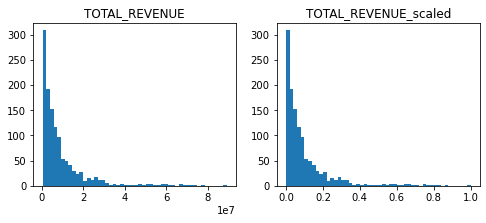

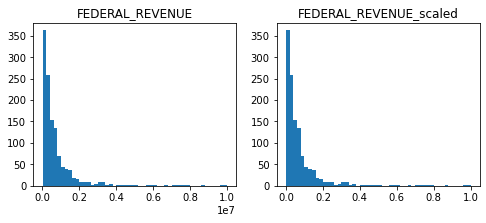

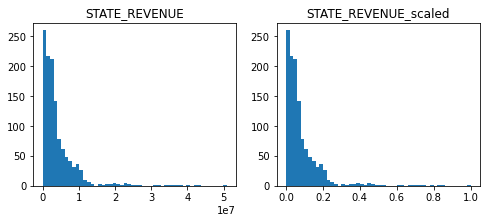

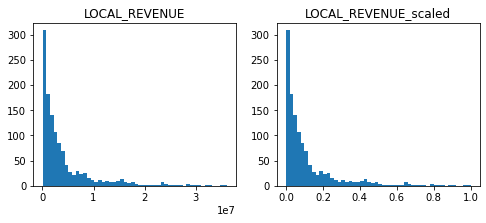

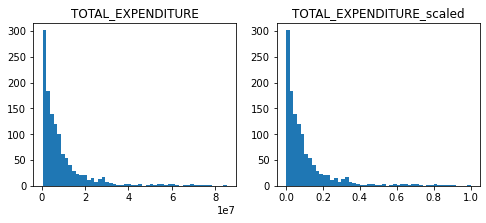

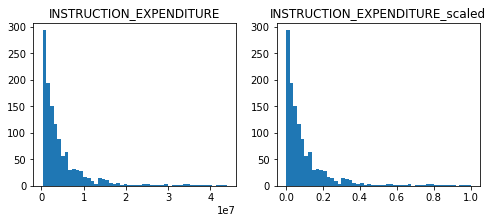

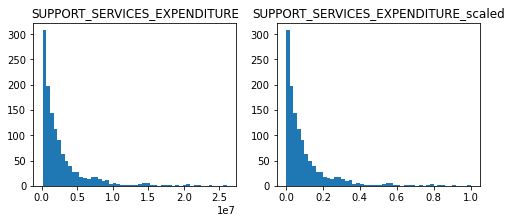

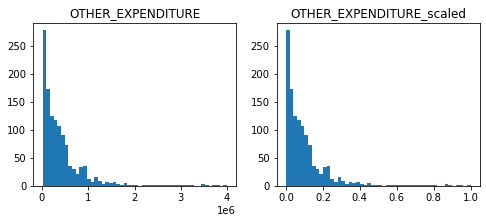

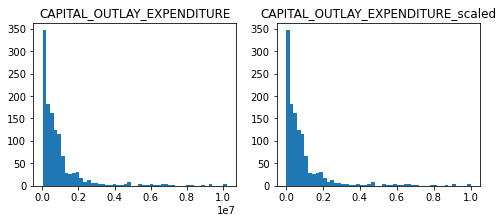

In [123]:
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

In [124]:
data.drop(['TOTAL_REVENUE','FEDERAL_REVENUE','STATE_REVENUE','LOCAL_REVENUE','TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE'], axis = 1, inplace = True)

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [125]:
data.head()

,STATE,YEAR,TOTAL_REVENUE_scaled,FEDERAL_REVENUE_scaled,STATE_REVENUE_scaled,LOCAL_REVENUE_scaled,TOTAL_EXPENDITURE_scaled,INSTRUCTION_EXPENDITURE_scaled,SUPPORT_SERVICES_EXPENDITURE_scaled,OTHER_EXPENDITURE_scaled,CAPITAL_OUTLAY_EXPENDITURE_scaled
51,0,1993,0.026611,0.029904,0.033971,0.020586,0.027721,0.029726,0.025240,0.056641,0.018754
52,1,1993,0.008177,0.014310,0.015241,0.005973,0.007600,0.005249,0.011337,0.006212,0.012054
53,2,1993,0.033378,0.028604,0.027805,0.046289,0.037038,0.030054,0.033218,0.038285,0.065364
54,3,1993,0.009929,0.009494,0.015148,0.011743,0.010542,0.011836,0.009513,0.014325,0.008336
55,4,1993,0.310729,0.212673,0.335218,0.244007,0.325670,0.343614,0.338551,0.400805,0.189214


## Построение моделей:

In [126]:
X = data.drop(['TOTAL_EXPENDITURE_scaled'], axis = 1)
Y = data.TOTAL_EXPENDITURE_scaled
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

     STATE  YEAR  TOTAL_REVENUE_scaled  FEDERAL_REVENUE_scaled  \
51      0  1993              0.026611                0.029904   
52      1  1993              0.008177                0.014310   
53      2  1993              0.033378                0.028604   
54      3  1993              0.009929                0.009494   
55      4  1993              0.310729                0.212673   

    STATE_REVENUE_scaled  LOCAL_REVENUE_scaled  \
51              0.033971              0.020586   
52              0.015241              0.005973   
53              0.027805              0.046289   
54              0.015148              0.011743   
55              0.335218              0.244007   

    INSTRUCTION_EXPENDITURE_scaled  SUPPORT_SERVICES_EXPENDITURE_scaled  \
51                        0.029726                             0.025240   
52                        0.005249                             0.011337   
53                        0.030054                             0.

In [159]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.30)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

       STATE  YEAR  TOTAL_REVENUE_scaled  FEDERAL_REVENUE_scaled  \
1147     26  2014              0.110319                0.086583   
632      21  2004              0.097551                0.055026   
446      40  2000              0.187321                0.099322   
239      37  1996              0.131909                0.067389   
546      38  2002              0.043997                0.046619   

      STATE_REVENUE_scaled  LOCAL_REVENUE_scaled  \
1147              0.083825              0.140513   
632               0.067513              0.140830   
446               0.121088              0.273833   
239               0.094911              0.183276   
546               0.046084              0.041650   

      INSTRUCTION_EXPENDITURE_scaled  SUPPORT_SERVICES_EXPENDITURE_scaled  \
1147                        0.113907                             0.117444   
632                         0.107498                             0.097751   
446           

### **Модель "Дерево решений"**

In [160]:
from sklearn.tree import DecisionTreeRegressor

In [162]:
dtc = DecisionTreeRegressor(random_state=1).fit(X_train, Y_train)
data_test_predicted_dtc = dtc.predict(X_test)

### **Модель "Случайный лес"**

In [163]:
from sklearn.ensemble import RandomForestRegressor

In [164]:
RF = RandomForestRegressor(random_state=1).fit(X_train, Y_train)
data_test_predicted_rf = RF.predict(X_test)

In [165]:
from sklearn.metrics import mean_squared_error, r2_score

### **Оценка качества моделей:**

В качестве метрик для оценки качества моделей я использую Mean squared error (средняя квадратичная ошибка), как наиболее часто используемую метрику для оценки качества регрессии, и метрику $R^2$ (коэффициент детерминации), потому что эта метрика является нормированной.

In [166]:
# Mean squared error - средняя квадратичная ошибка
print('Метрика MSE:\nДерево решений: {}\nСлучайный лес: {}'.format(mean_squared_error(Y_test, data_test_predicted_dtc), mean_squared_error(Y_test, data_test_predicted_rf)))

Метрика MSE:
Дерево решений: 0.0001797353469085379
Случайный лес: 0.0001170196395991741


In [167]:
# 4) Метрика R2 или коэффициент детерминации
print('Метрика R\u00B2:\nДерево решений: {}\nСлучайный лес: {}'.format(r2_score(Y_test, data_test_predicted_dtc), r2_score(Y_test, data_test_predicted_rf)))

Метрика R²:
Дерево решений: 0.9933087725656454
Случайный лес: 0.9956435668536433


### Вывод:

Исходя из оценки качества построенных моделей можно увидеть, что модели "Случайный лес" и "Дерево решений" одинаково хоршо справились с поставленной задачей